In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import collections


# Define the variables
from typing import List, Union

**ANÁLISIS UNIVARIADO**

**PRIMERA ENTREGA**

In [2]:
# Read the Excel Listening file into a DataFrame
data_list = pd.read_excel(os.path.join("data", "listings.xlsx"))
data_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17825 entries, 0 to 17824
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            17825 non-null  int64         
 1   listing_url                                   17825 non-null  object        
 2   scrape_id                                     17825 non-null  int64         
 3   last_scraped                                  17825 non-null  datetime64[ns]
 4   name                                          17792 non-null  object        
 5   description                                   17536 non-null  object        
 6   neighborhood_overview                         11705 non-null  object        
 7   picture_url                                   17825 non-null  object        
 8   host_id                                       17825 non-null  int6

In [3]:
#INTERVALO DEL PRECIO:
print("INTERVALO DEL PRECIO")
#Tabla de frecuencia:
#Create a new datarfame with unique values and type of each column in the dataframe
data_list_unique = pd.DataFrame({'Column Name': data_list.columns, 'Unique Values': [data_list[col].nunique() for col in data_list.columns], 'Data Type': [data_list[col].dtype for col in data_list.columns]})
review_scores_rating = data_list['review_scores_rating'].dropna()

print("\n¿Entre que puntajes está el 53% de las calificaciones de revisión más bajas de la plataforma?")

#Creación de intervalos
intervalos = [20+i*6 for i in range(0, 15)]

#Conteo
conteo,_ = np.histogram(review_scores_rating, bins=intervalos)

#Creación de la tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': [f"{intervalos[i]} - {intervalos[i+1]}" for i in range(len(intervalos)-1)],
    'Frecuencia': conteo
})

tabla_frecuencias['Frecuencia Acumulada'] = tabla_frecuencias['Frecuencia'].cumsum()
tabla_frecuencias['Frecuencia Relativa'] = tabla_frecuencias['Frecuencia'] / tabla_frecuencias['Frecuencia'].sum()
tabla_frecuencias['Frecuencia Relativa Acumulada'] = tabla_frecuencias['Frecuencia Relativa'].cumsum()
tabla_frecuencias['Frecuencia Relativa Porcentual %'] = tabla_frecuencias['Frecuencia Relativa'] * 100
tabla_frecuencias['Frecuencia Relativa Porcentual Acumulada %'] = tabla_frecuencias['Frecuencia Relativa Acumulada'] * 100
tabla_frecuencias = tabla_frecuencias.round(4)
print("\nTabla de frecuencias:")
print("Entre 20 a 98 puntos se encuentra el 53% de las calificaciones de revisión más bajas de la plataforma.")
tabla_frecuencias

INTERVALO DEL PRECIO

¿Entre que puntajes está el 53% de las calificaciones de revisión más bajas de la plataforma?

Tabla de frecuencias:
Entre 20 a 98 puntos se encuentra el 53% de las calificaciones de revisión más bajas de la plataforma.


,Intervalo,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Frecuencia Relativa Acumulada,Frecuencia Relativa Porcentual %,Frecuencia Relativa Porcentual Acumulada %
0,20 - 26,24,24,0.0016,0.0016,0.1580,0.1580
1,26 - 32,0,24,0.0000,0.0016,0.0000,0.1580
2,32 - 38,1,25,0.0001,0.0016,0.0066,0.1646
3,38 - 44,22,47,0.0014,0.0031,0.1449,0.3095
4,44 - 50,2,49,0.0001,0.0032,0.0132,0.3226
5,50 - 56,8,57,0.0005,0.0038,0.0527,0.3753
6,56 - 62,96,153,0.0063,0.0101,0.6321,1.0074
7,62 - 68,27,180,0.0018,0.0119,0.1778,1.1852
8,68 - 74,78,258,0.0051,0.0170,0.5136,1.6988
9,74 - 80,57,315,0.0038,0.0207,0.3753,2.0741


In [4]:
#PRICE

Price = data_list['price'].dropna()
Price = Price[Price > 0]  # Eliminar valores nulos y ceros

#Calcular la tabla de percentiles del 1 a 100.
percentiles = [i for i in range(1, 101)] 
percentiles_values = np.percentile(Price, percentiles)
tabla_percentiles = pd.DataFrame({
    'Percentil': percentiles,
    'Price': percentiles_values
})
print("¿Cuál es el precio promedio de alquiler de un inmueble qué se situé por encima del 78%?")
print("El promedio de alquiles de estos inmuebles es de: ", tabla_percentiles[(tabla_percentiles["Percentil"]>78) & (tabla_percentiles["Percentil"]<100)]["Price"].mean())
tabla_percentiles[tabla_percentiles["Percentil"]>78]

¿Cuál es el precio promedio de alquiler de un inmueble qué se situé por encima del 78%?
El promedio de alquiles de estos inmuebles es de:  276.86857142857116


,Percentil,Price
78,79,199.00
79,80,200.00
80,81,200.00
81,82,200.00
82,83,206.00
83,84,215.00
84,85,220.00
85,86,225.00
86,87,235.00
87,88,248.00


In [6]:
print("¿Qué porcentaje de inmuebles en la ciudad se alquilan por debajo del promedio de la ciudad? ")

mean_ = Price.mean()
tbl = tabla_percentiles[tabla_percentiles["Price"]<mean_]
print(f"\nEl procentaje de inmbueles en la ciudad se alquinal por debajo del promeido es del: {tbl["Percentil"].max()}%")
tbl

¿Qué porcentaje de inmuebles en la ciudad se alquilan por debajo del promedio de la ciudad? 

El procentaje de inmbueles en la ciudad se alquinal por debajo del promeido es del: 66%


,Percentil,Price
0,1,33.00
1,2,40.00
2,3,48.00
3,4,50.00
4,5,55.00
...,...,...
61,62,150.00
62,63,150.00
63,64,150.00
64,65,150.00


In [7]:
print("Se desea alquilar un inmueble en la ciudad de Ámsterdam que sea 100 euros \nmás costoso que el promedio distrital, ¿a cuantas desviaciones estaría este inmueble del \npromedio global?")

std_dev = Price.std()
mean_district = mean_ + 100
z_score = (mean_district-mean_) / (std_dev)

print("El valor buscado se encuentra a", round(z_score,0), "desviaciones estándar del promedio global.")

Se desea alquilar un inmueble en la ciudad de Ámsterdam que sea 100 euros 
más costoso que el promedio distrital, ¿a cuantas desviaciones estaría este inmueble del 
promedio global?
El valor buscado se encuentra a 1.0 desviaciones estándar del promedio global.


**VALIDACIÓN DE HIPÓTESIS PARA EL CASO DE USO AIRBNB**

- El 50% de las publicaciones de la plataforma, en su mayoría ofrecen habitaciones de hotel.
- La gran mayoría de las habitaciones privadas poseen precios entre 4 y 129 euros.
- Las casas y apartamentos poseen las calificaciones por revisión más altas de la plataforma.
- Las casas y apartamentos poseen la mayor dispersión respecto a sus precios de alquiler.
- Las publicaciones con mejor calificación de revisión y precio son casas y apartamentos, habitaciones de hotel.

In [8]:
print("Hipotesis 1: ")
print("\nEl 50% de las publicaciones de la plataforma, en su mayoría ofrecen habitaciones de hotel.")

data_list_ = data_list.copy()
#create a new column, it's a 0 or 1 number depending that it's a hotel room or not
data_list_['Hotel room'] = np.where(data_list_['room_type'] == 'Hotel room', 1, 0)
hotel_room = data_list_["Hotel room"].value_counts()[1]
index = data_list_.shape[0]

por_hotel_room = (hotel_room / index)* 100

if por_hotel_room != 50:
    print(f"\nNo es verdadero, solo el {por_hotel_room:.4f}% ofrecen habitaciones de hotel.")
else:
    print("\nEs cierto, el 50% de las publicaciones ofrecen habitaciones de hotel.")

Hipotesis 1: 

El 50% de las publicaciones de la plataforma, en su mayoría ofrecen habitaciones de hotel.

No es verdadero, solo el 0.6957% ofrecen habitaciones de hotel.


In [20]:
print("Hipotesis 2: ")
print("\nLa gran mayoría de las habitaciones privadas poseen precios entre 4 y 129 euros.")

n_unique = Price.nunique()
n_bins = min(100, n_unique)  # Nunca más de 100
data_list_['percentil'] = pd.qcut(data_list_['price'], q=n_bins, labels=False, duplicates='drop') + 1
grater_ = data_list_[data_list_["percentil"] < 75]
res_ = grater_[(grater_["price"] >= 4) & (grater_["price"] <= 129)]["price"].count()
total_ = grater_["price"].count()
if res_ / total_ >= 0.75:
    print(f"\nEs cierto, el {res_ / total_ * 100:.2f}% de las habitaciones privadas poseen precios entre 4 y 129 euros.")
elif res_ / total_ > 0.5:
    print(f"\nMás del 50% de las habitaicones privadas tienen {res_ / total_ * 100:.2f}% de las habitaciones privadas poseen precios entre 4 y 129 euros.")
else:
    print(f"\nNo es cierto, solo el {res_ / total_ * 100:.2f}% de las habitaciones privadas poseen precios entre 4 y 129 euros.")

Hipotesis 2: 

La gran mayoría de las habitaciones privadas poseen precios entre 4 y 129 euros.

Más del 50% de las habitaicones privadas tienen 50.36% de las habitaciones privadas poseen precios entre 4 y 129 euros.


In [9]:
print("Hipotesis 3: ")
print("\n¿Cuál es el tipo de room que tiene revisión más altas de la plataforma?.")
#Mean por cada room_type
mean_scores = data_list_.groupby('room_type')['review_scores_rating'].mean().sort_values(ascending=False).round(2)
print(f"\nLas casas y apartamentos poseen las calificaciones por revisión más altas de la plataforma con un promedio de revisión de {mean_scores["Entire home/apt"]:.2f}.")
print(f"\n{mean_scores}")

Hipotesis 3: 

¿Cuál es el tipo de room que tiene revisión más altas de la plataforma?.

Las casas y apartamentos poseen las calificaciones por revisión más altas de la plataforma con un promedio de revisión de 95.35.

room_type
Entire home/apt    95.35
Shared room        94.02
Hotel room         94.00
Private room       94.00
Name: review_scores_rating, dtype: float64


In [70]:
print("Hipotesis 4: ")
print("\nLas casas y apartamentos poseen la mayor dispersión respecto a sus precios de alquiler.")

#Desviación estándar por cada room_type
std_dev_prices = data_list_.groupby('room_type')['price'].std().sort_values(ascending=False).round(2)
print(f"\nNo es cierto, las casas y apartamentos no poseen la mayor dispersión respecto a sus precios de alquiler con una desviación estándar de {std_dev_prices["Entire home/apt"]:.2f}, el mayor es Hotel room con {std_dev_prices["Hotel room"]:.2f}."
)
print(f"\n{std_dev_prices}")


Hipotesis 4: 

Las casas y apartamentos poseen la mayor dispersión respecto a sus precios de alquiler.

No es cierto, las casas y apartamentos no poseen la mayor dispersión respecto a sus precios de alquiler con una desviación estándar de 160.08, el mayor es Hotel room con 165.63.

room_type
Hotel room         165.63
Entire home/apt    160.08
Shared room        123.83
Private room       113.51
Name: price, dtype: float64


In [10]:
print("Hipotesis 5: ")
print("\nLas publicaciones con mejor calificación de revisión y precio son casas y apartamentos, habitaciones de hotel.")

#groupby room_type and get the mean of review_scores_rating and price
grouped = data_list_.groupby('room_type').agg({'review_scores_rating': 'mean', 'price': 'mean'}).sort_values(by=['review_scores_rating', 'price'], ascending=False).round(2)
print(f"\nLas publicaciones con mejor calificación de revisión y precio no son casas y apartamentos, y habitaciones de hotel; \nson {grouped.index[0]} con una calificación de revisión de {grouped.iloc[0]['review_scores_rating']:.2f} y un precio promedio de {grouped.iloc[0]['price']:.2f}.")
grouped


Hipotesis 5: 

Las publicaciones con mejor calificación de revisión y precio son casas y apartamentos, habitaciones de hotel.

Las publicaciones con mejor calificación de revisión y precio no son casas y apartamentos, y habitaciones de hotel; 
son Entire home/apt con una calificación de revisión de 95.35 y un precio promedio de 169.86.


,review_scores_rating,price
room_type,,
Entire home/apt,95.35,169.86
Shared room,94.02,101.49
Hotel room,94.00,135.12
Private room,94.00,98.98


In [11]:
n_unique = Price.nunique()
n_bins = min(100, n_unique)  # Nunca más de 100
data_list_['percentil'] = pd.qcut(data_list_['price'], q=n_bins, labels=False, duplicates='drop') + 1
data_list_.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Hotel room,percentil
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,2021-04-12,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,NaN,t,1,0,1,0,1.9,0,6


**Validación de hipótesis a partir de gráficos**

Hipotesis 1:

¿Cuál es el tipo de inmueble que más ha publicados Airbnb en la ciudad de Ámsterdam?


C:\Users\57317\AppData\Local\Temp\ipykernel_5756\706979311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_list_, x='room_type', order=data_list_['room_type'].value_counts().index, palette='viridis')


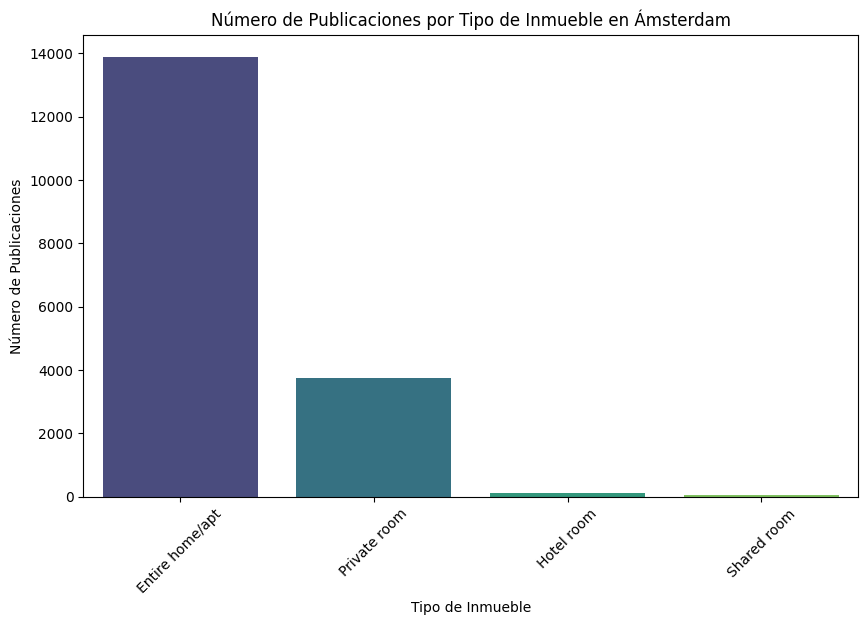


 El que tiene más publicaciones es el tipo de inmueble:  Entire home/apt


In [12]:
print("Hipotesis 1:")
print("\n¿Cuál es el tipo de inmueble que más ha publicados Airbnb en la ciudad de Ámsterdam?")

#Create a bar graphic of the number of publications by room_type in Amsterdam
plt.figure(figsize=(10, 6))
sns.countplot(data=data_list_, x='room_type', order=data_list_['room_type'].value_counts().index, palette='viridis')
plt.title('Número de Publicaciones por Tipo de Inmueble en Ámsterdam')
plt.xlabel('Tipo de Inmueble')
plt.ylabel('Número de Publicaciones')
plt.xticks(rotation=45)
plt.show()

print("\n El que tiene más publicaciones es el tipo de inmueble: ", data_list_['room_type'].value_counts().idxmax())

Hipotesis 2: 

¿Qué tipo de habitaciones posee los precios más económicos de la ciudad?


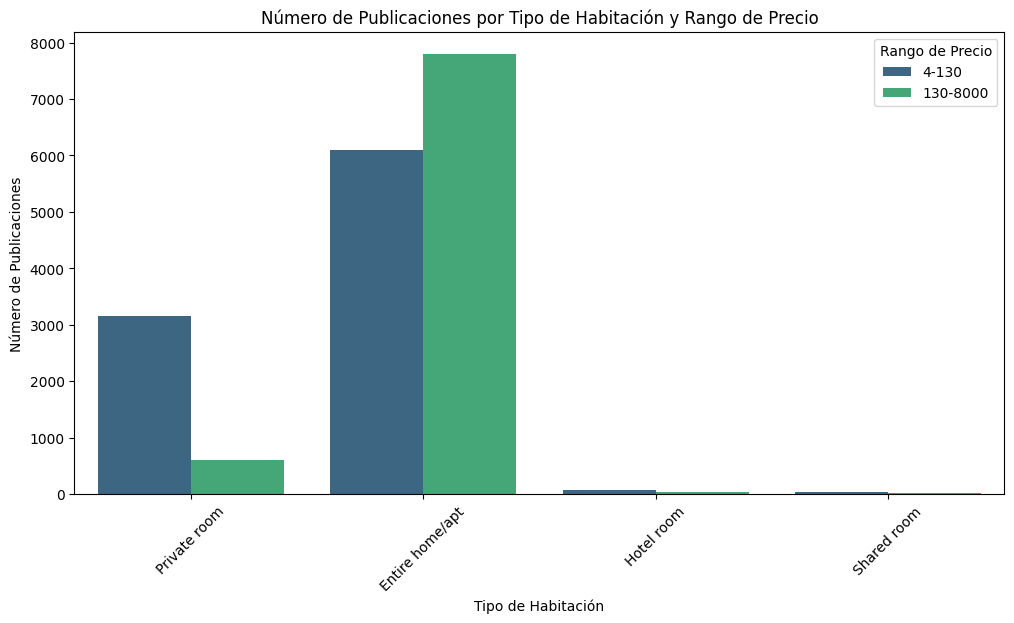


El tipo de habitación con los precios más económicos es:  Shared room


In [88]:
print("Hipotesis 2: ")
print("\n¿Qué tipo de habitaciones posee los precios más económicos de la ciudad?")

#Create bar plot agroup by two categories: prices [1,130] and [130,8001] of prices for each type room, discripting the 
#number of publications in each category
min_ = Price.min()
max_ = Price.max()

plt.figure(figsize=(12, 6))
sns.countplot(data=data_list_, x='room_type', hue=pd.cut(data_list_['price'], bins=[min_, 130, max_], labels=[f'{min_}-130', f'130-{max_}']), palette='viridis')
plt.title('Número de Publicaciones por Tipo de Habitación y Rango de Precio')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Número de Publicaciones')
plt.legend(title='Rango de Precio')
plt.xticks(rotation=45)
plt.show()

print("\nEl tipo de habitación con los precios más económicos es: ", data_list_['room_type'].value_counts().idxmin())

Hipotesis 3: 

¿Cuál es el tipo de habitación que posee la mayor dispersión en sus precios de alquiler?


C:\Users\57317\AppData\Local\Temp\ipykernel_5756\784832887.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_list_, x='price', y='room_type', palette='viridis')


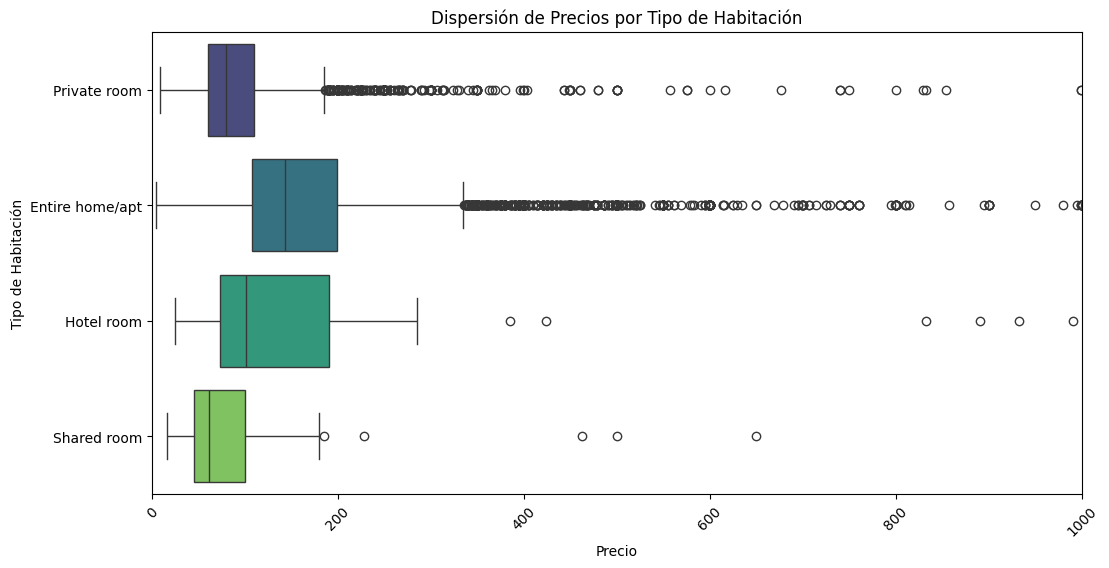


El tipo de habitación que posee la mayor dispersión en sus precios de alquiler es:  Entire home/apt


In [13]:
print("Hipotesis 3: ")
print("\n¿Cuál es el tipo de habitación que posee la mayor dispersión en sus precios de alquiler?")

#Delete of cero prices of the column price on data_list_
data_list_ = data_list_[data_list_['price'] > 0]

#Create a boxplot of the prices by room_type, but the prices is the x-axis and room_type is the y-axis unti 1000 prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_list_, x='price', y='room_type', palette='viridis')
plt.xlim(0, 1000)  # Limitar el eje x para enfocar en precios razonables
plt.title('Dispersión de Precios por Tipo de Habitación')
plt.xlabel('Precio')
plt.ylabel('Tipo de Habitación')
plt.xticks(rotation=45)
plt.show()

print("\nEl tipo de habitación que posee la mayor dispersión en sus precios de alquiler es: ", data_list_['room_type'].value_counts().idxmax())

Hipotesis 4: 

¿Las casas y apartamentos con las mejores calificaciones de revisión describen altos precios de alquiler?


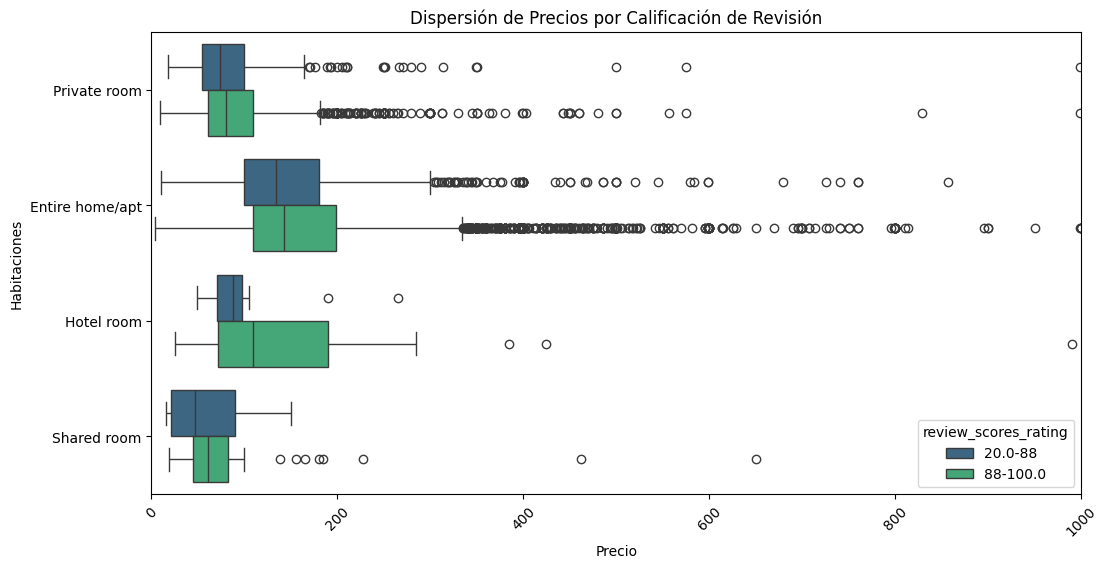

In [99]:
print("Hipotesis 4: ")
print("\n¿Las casas y apartamentos con las mejores calificaciones de revisión describen altos precios de alquiler?")

min_score = data_list_['review_scores_rating'].min()
max_score = data_list_['review_scores_rating'].max()

#Create a box plot of the prices by type room, but the prices is the x-axis and review_scores_rating is the y-axis
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_list_, x='price', y='room_type',hue=pd.cut(data_list_['review_scores_rating'], bins=[min_score, 88, max_score], labels=[f'{min_score}-88', f'88-{max_score}']), palette='viridis')
plt.xlim(0, 1000)  # Limitar el eje x para enfocar en precios razonables
plt.title('Dispersión de Precios por Calificación de Revisión')
plt.xlabel('Precio')
plt.ylabel('Habitaciones')
plt.xticks(rotation=45)
plt.show()

Hipotesis 5: 

¿Cuál de las siguientes Afirmaciones es la más acertada?


C:\Users\57317\AppData\Local\Temp\ipykernel_5756\1667501374.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped.reset_index(), x='room_type', y='review_scores_rating', palette='viridis')


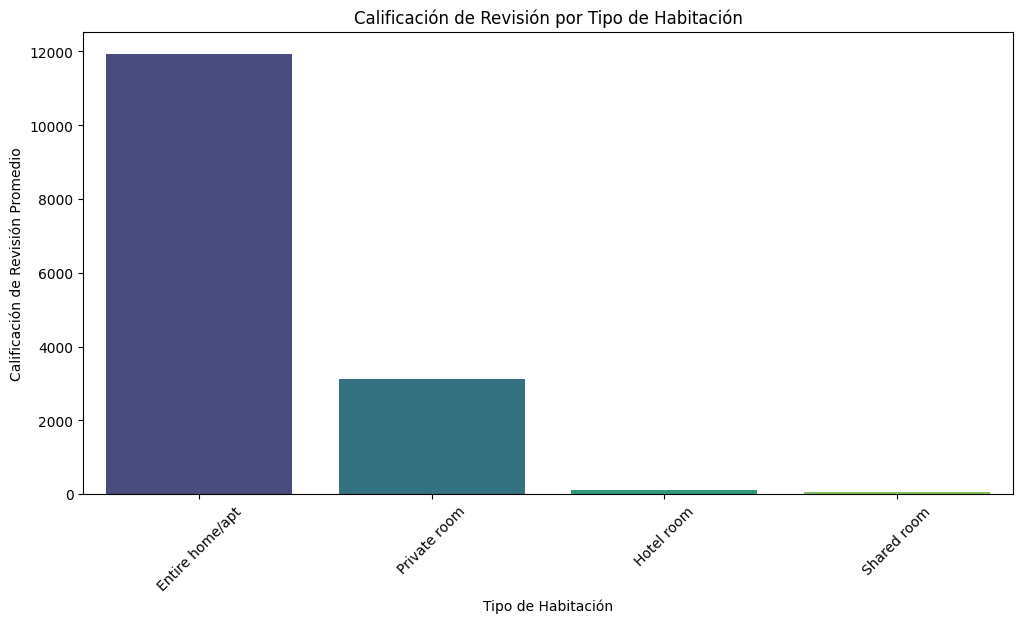

In [14]:
print("Hipotesis 5: ")
print("\n¿Cuál de las siguientes Afirmaciones es la más acertada?")

#Create a groupby of room_type and get the mean of review_scores_rating and price
grouped = data_list_.groupby('room_type').agg({'review_scores_rating': 'count', 'price': 'count'}).sort_values(by=['review_scores_rating', 'price'], ascending=False).round(2)
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped.reset_index(), x='room_type', y='review_scores_rating', palette='viridis')
plt.title('Calificación de Revisión por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Calificación de Revisión Promedio')
plt.xticks(rotation=45)
plt.show()

In [15]:
data_list_.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

**DATA CLEANING**

In [16]:
print("Pregunta #1: ")
print("\nSuponga que un punto de alojamiento de la plataforma de Airbnb ha recibido las siguientes \ncalificaciones, 4.7, 4.5 y 3.9 ¿Cuál debería ser la próxima calificación mínima que \ndebe recibir este punto de alojamiento para lograr un promedio de calificación de 4.5? ")

def mean_approximation(mean_:  Union[int, float], data_:  np.ndarray) -> float:
    """
    Calculate the mean approximation of a list of numbers.
    
    Parameters:
    mean (int, float): The mean value to approximate.
    list (List[int]): The list of numbers to approximate the mean from.
    
    Returns:
    float: The mean approximation.
    """
    weight = 1/(len(data_) + 1)
    if weight == 0:
        raise ValueError("The list cannot be empty.")
    else:
        new_variable = (mean_-(weight*np.sum(data_)))/(weight)
    return new_variable

res = mean_approximation(4.5, np.array([4.7,4.5,3.9]))
print("\nEl resultado de la aproximación de la media es:", res)

Pregunta #1: 

Suponga que un punto de alojamiento de la plataforma de Airbnb ha recibido las siguientes 
calificaciones, 4.7, 4.5 y 3.9 ¿Cuál debería ser la próxima calificación mínima que 
debe recibir este punto de alojamiento para lograr un promedio de calificación de 4.5? 

El resultado de la aproximación de la media es: 4.9


In [18]:
print("Pregunta 2: ")
print("\nSupongamos que los datos asociados a los precios de los puntos de alojamiento que dispone la \nplataforma Airbnb son $10, $20, $15 y $800 por día, ¿cuál de las siguientes afirmaciones es correcta?")

def calculate_central_scores(data: List[Union[int, float]]) -> dict:
    """
    Calculate the central scores (mean, median, mode) of a list of numbers.
    
    Parameters:
    data (List[Union[int, float]]): The list of numbers to calculate the central scores from.
    
    Returns:
    dict: A dictionary containing the mean, median, and mode.
    """
    mean = np.mean(data)
    median = np.median(data)
    mode = statistics.mode(data) if len(data) > 0 else None
    
    return {
        'mean': mean,
        'median': median,
        'mode': mode
    }

data = [10, 20, 15, 800]
res = calculate_central_scores(data)
print("\nEl resultado de la media es:", res['mean'])
print("El resultado de la mediana es:", res['median'])
print("El resultado de la moda es:", res['mode'])

Pregunta 2: 

Supongamos que los datos asociados a los precios de los puntos de alojamiento que dispone la 
plataforma Airbnb son $10, $20, $15 y $800 por día, ¿cuál de las siguientes afirmaciones es correcta?

El resultado de la media es: 211.25
El resultado de la mediana es: 17.5
El resultado de la moda es: 10


C:\Users\57317\AppData\Local\Temp\ipykernel_5756\3294861002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data, palette='viridis')


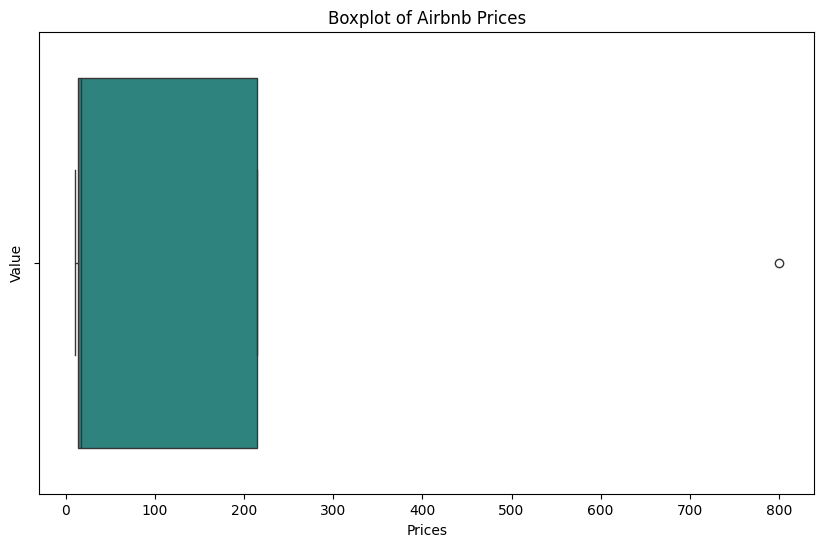

In [19]:
#Create a boxpot of data of the previous cell
plt.figure(figsize=(10, 6))
sns.boxplot(x=data, palette='viridis')
plt.title('Boxplot of Airbnb Prices')
plt.xlabel('Prices')
plt.ylabel('Value')
plt.show()

**RETO III: Validación hipótesis para el caso de uso Airbnb.**

1. Las puntuaciones de revisión y comunicación son directamente proporcionales.

Hipotesis 1:
1. Las puntuaciones de revisión y comunicación son directamente proporcionales.

                              review_scores_rating  review_scores_communication
review_scores_rating                         1.00                         0.66
review_scores_communication                  0.66                         1.00

Esto significa que a medida que las puntuaciones de revisión aumentan, las puntuaciones de comunicación también tienden a aumentar, 
lo que sugiere una relación positiva entre ambas variables, no de manera perfecta pero tenderá a subir.


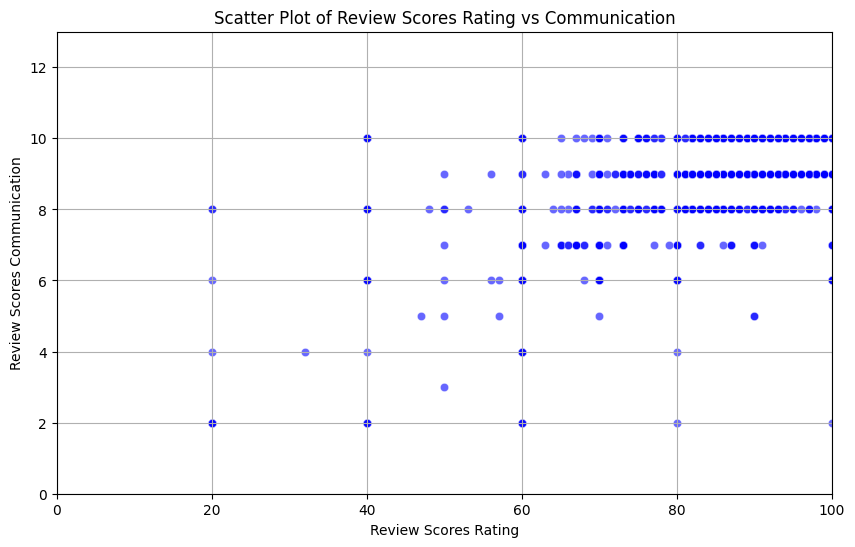

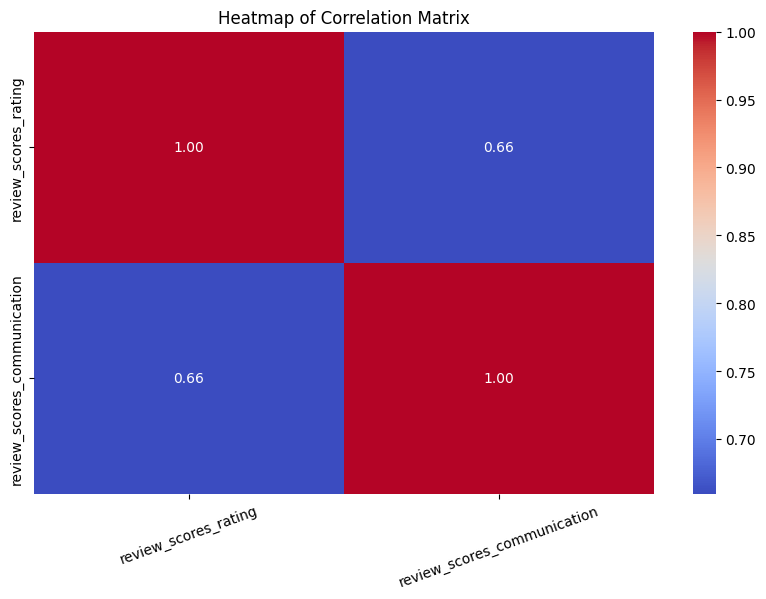

In [48]:
print("Hipotesis 1:")
print("1. Las puntuaciones de revisión y comunicación son directamente proporcionales.")

corr_matrix_1 = data_list_[["review_scores_rating","review_scores_communication"]][(data_list_["review_scores_rating"]>0)&(data_list_["review_scores_communication"]>0)].dropna().corr(method='pearson').round(2)

print("\n", corr_matrix_1)

print("\nEsto significa que a medida que las puntuaciones de revisión aumentan, las puntuaciones de comunicación también tienden a aumentar, \nlo que sugiere una relación positiva entre ambas variables, no de manera perfecta pero tenderá a subir.")

#Print the scatter plot of Review_scores_rating and Review_scores_communication
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_list_, x='review_scores_rating', y='review_scores_communication', alpha=0.6, color='blue')
plt.title('Scatter Plot of Review Scores Rating vs Communication')
plt.xlabel('Review Scores Rating')
plt.ylabel('Review Scores Communication')
plt.xlim(0, 100)  # Limitar el eje x para enfocar
plt.ylim(0, 13)  # Limitar el eje y para enfocar
plt.grid(True)
plt.show()

#create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=20)
plt.show()

Hipotesis 2:
2. La relación entre el precio del alquiler y el número de habitaciones es inversamente proporcional.

           price  bedrooms
price      1.00      0.25
bedrooms   0.25      1.00

Hay una ligera tendencia que, cuando el precio auemnta, el número de habitaciones también tiende a aumentar, 
sugiriendo un relación directa débil entre ambas variables.


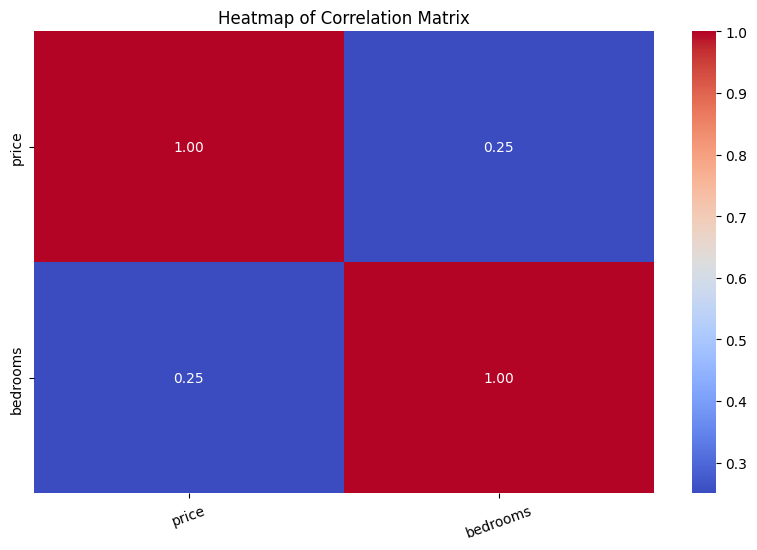

In [45]:
print("Hipotesis 2:")
print("2. La relación entre el precio del alquiler y el número de habitaciones es inversamente proporcional.")

corr_matrix_2 = data_list_[["price","bedrooms"]][(data_list_["price"]>0) & (data_list_["bedrooms"]>0)].dropna().corr(method='pearson').round(2)
print("\n", corr_matrix_2)

print("\nHay una ligera tendencia que, cuando el precio auemnta, el número de habitaciones también tiende a aumentar, \nsugiriendo un relación directa débil entre ambas variables.")

#create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=20)
plt.show()

Hipotesis 3:
Si se alquila un inmueble en la ciudad de Ámsterdam con un puntaje de revisión entre 80 y 89 puntos el 80% 
de las publicaciones pueden ser habitación privada, casas o apartamento


C:\Users\57317\AppData\Local\Temp\ipykernel_5756\1444267239.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_types_count.index, y=room_types_count.values, palette='viridis')


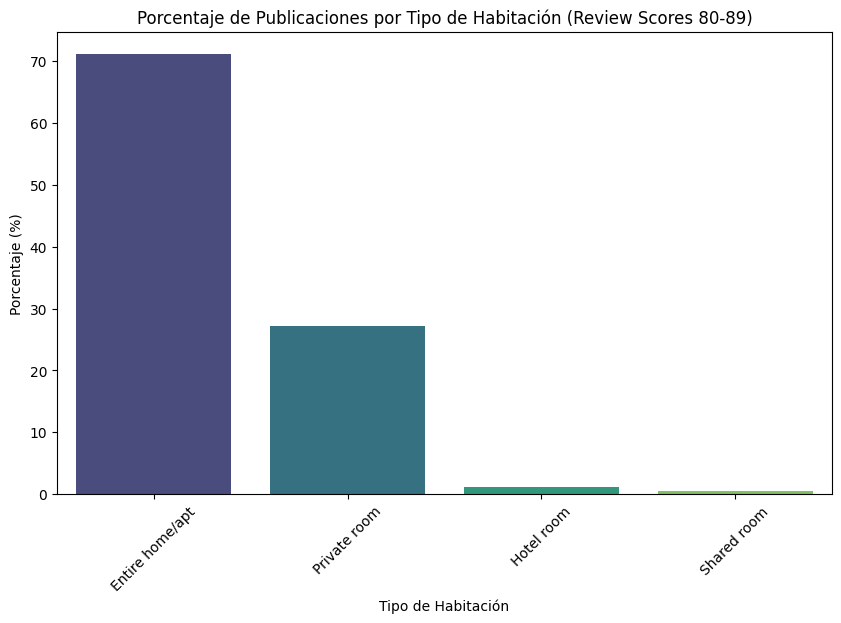

room_type
Entire home/apt    71.152519
Private room       27.191166
Hotel room          1.173223
Shared room         0.483092
Name: proportion, dtype: float64

Es cierto, más del 80% (98.34%) de las publicaciones son casas y apartamentos o habitaciones privadas.


In [58]:
print("Hipotesis 3:")
print("Si se alquila un inmueble en la ciudad de Ámsterdam con un puntaje de revisión entre 80 y 89 puntos el 80% \nde las publicaciones pueden ser habitación privada, casas o apartamento")

#Filter the data for review_scores_rating between 80 and 89
filtered_data = data_list_[(data_list_['review_scores_rating'] >= 80) & (data_list_['review_scores_rating'] <= 89)]
room_types_count = filtered_data['room_type'].value_counts(normalize=True)*100

#barplot of filtered_data
plt.figure(figsize=(10, 6))
sns.barplot(x=room_types_count.index, y=room_types_count.values, palette='viridis')
plt.title('Porcentaje de Publicaciones por Tipo de Habitación (Review Scores 80-89)')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.show()

print(room_types_count)

aux = room_types_count["Entire home/apt"] + room_types_count["Private room"]
if aux >= 80:
    print(f"\nEs cierto, más del 80% ({aux:.2f}%) de las publicaciones son casas y apartamentos o habitaciones privadas.")
else:
    print(f"\nNo es cierto, solo el {aux:.2f}% de las publicaciones son casas y apartamentos o habitaciones privadas.")

Hipotesis 4:
2. Si se alquila una casa o apartamento el 30% de las publicaciones tendrán un puntaje de 
revisión entre el 80 y 100 puntos.

No, el 98.08% de las casas o apartamentos que se alquilan corresponden a una revisión 
entre el 80 y 100 puntos

Porcentaje de Publicaciones por Tipo de Habitación (Review Scores 80-100): 98.08%


C:\Users\57317\AppData\Local\Temp\ipykernel_5756\3574918552.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(


C:\Users\57317\AppData\Local\Temp\ipykernel_5756\3574918552.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Intervalo de Puntaje')


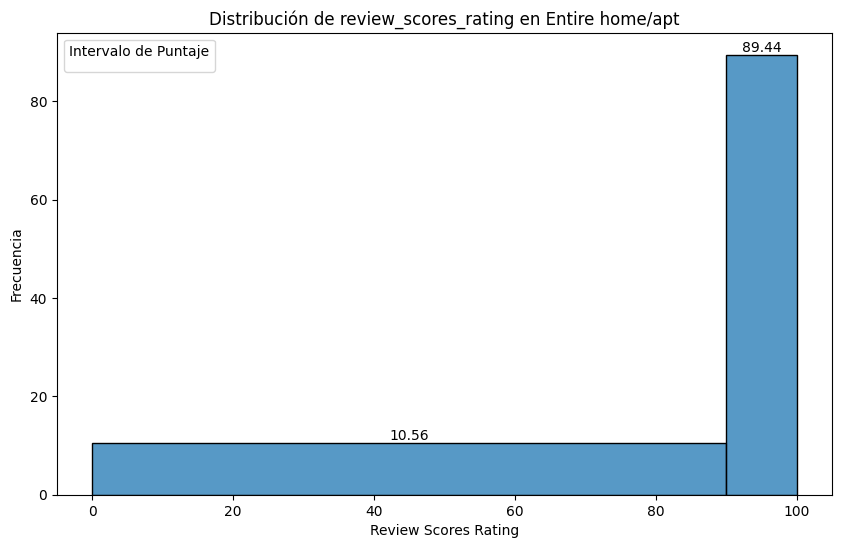

In [128]:
print("Hipotesis 4:")
print("2. Si se alquila una casa o apartamento el 30% de las publicaciones tendrán un puntaje de \nrevisión entre el 80 y 100 puntos.")

room_types_home_apt = data_list_[(data_list_['room_type'] == 'Entire home/apt') & (data_list_['review_scores_rating'] > 0)]
total_ = room_types_home_apt.shape[0]
room_types_home_apt_rsr = room_types_home_apt[(room_types_home_apt["review_scores_rating"]>=80) & (room_types_home_apt["review_scores_rating"]<=100)]
room_types_home_apt_rsr_count = room_types_home_apt_rsr.shape[0]
room_types_home_apt_count = (room_types_home_apt_rsr_count / total_) * 100

if room_types_home_apt_count != 30:
    print(f"\nNo, el {room_types_home_apt_count:.2f}% de las casas o apartamentos que se alquilan corresponden a una revisión \nentre el 80 y 100 puntos")
else:
    print(f"Es verdadero {room_types_home_apt_count:.2f}")

print(f"\nPorcentaje de Publicaciones por Tipo de Habitación (Review Scores 80-100): {room_types_home_apt_count:.2F}%")

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=room_types_home_apt,
    x='review_scores_rating',
    bins=[0, 90, 100],
    palette='viridis',
    multiple='stack',
    stat = 'percent'
)
# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f') # Format to two decimal places
plt.title('Distribución de review_scores_rating en Entire home/apt')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frecuencia')
plt.legend(title='Intervalo de Puntaje')
plt.show()


Hipotesis 5:
El 30% de las publicaciones son habitaciones privadas 
que poseen entre 90 y 100 puntos de revisión.
El resultado es 17.36%


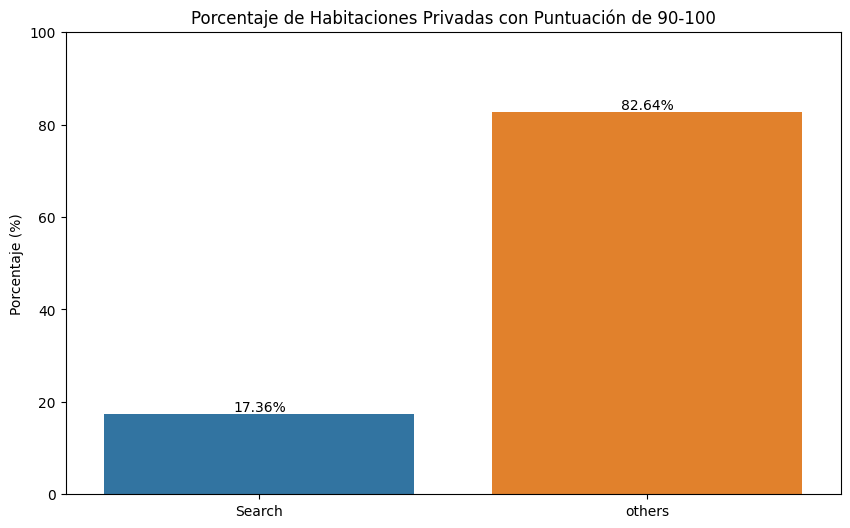

In [178]:
print("Hipotesis 5:")
print("El 30% de las publicaciones son habitaciones privadas \nque poseen entre 90 y 100 puntos de revisión.")

room_types_priv_count = data_list_[(data_list_['room_type'] == 'Private room') & (data_list_['review_scores_rating'] >= 90) & (data_list_['review_scores_rating'] <= 100)].shape[0]
total_ =data_list_[data_list_['review_scores_rating']>0].shape[0]
count_ = (room_types_priv_count/ total_) * 100

print(f"El resultado es {count_:.2f}%")

# Calcular porcentajes para el gráfico
search_percentage = (room_types_priv_count / total_) * 100
others_percentage = 100 - search_percentage

data_hip_5_pct = pd.DataFrame(data=[search_percentage, others_percentage], columns=['Percentage'], index=['Search','others']).T

plt.figure(figsize=(10,6))
ax = sns.barplot(data=data_hip_5_pct)

# Añadir etiquetas de porcentaje a las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%') # Formato con dos decimales y '%'

plt.title("Porcentaje de Habitaciones Privadas con Puntuación de 90-100")
plt.ylabel("Porcentaje (%)")
plt.ylim(0, 100) # Establecer el límite del eje y a 100
plt.show()


**TABLAS DE CONTINGENCIA**

In [211]:
#Contruir una tabla de contingencia (tabla de frecuencias de intervalos) de review_scores_rating y room_type [20,30,40,50,60,70,80,90,100] con total de 8 intervalos y con una columna total
print("Tablas de contingencia de las variables review_scores_rating y room_type")
rsr_data = data_list_[(data_list_['review_scores_rating'] >=80) & (data_list_['review_scores_rating'] <= 89)]["review_scores_rating"]
contingency_table = pd.crosstab(pd.cut(data_list_['review_scores_rating'], bins=[10 ,20, 30, 40, 50, 60, 70, 80, 90, 100]), data_list_['room_type'], normalize=False)
print("\nTabla de contingencia:")
print(contingency_table)

Tablas de contingencia de las variables review_scores_rating y room_type

Tabla de contingencia:
room_type             Entire home/apt  Hotel room  Private room  Shared room
review_scores_rating                                                        
(10, 20]                           17           0             7            0
(30, 40]                           13           0            10            0
(40, 50]                            6           0             3            0
(50, 60]                           71           0            26            0
(60, 70]                           56           0            18            0
(70, 80]                          364           3           118            1
(80, 90]                         1213          19           460            9
(90, 100]                       10190          75          2474           34
